# Subgraphs

In [1]:
import pandas as pd
import os
import networkx as nx
import re
import matplotlib.pyplot as plt

# Gets the current directory where the script is located
current_dir = os.getcwd()
print(current_dir)
current_dir = current_dir.replace("src", "dataset")

# Builds full paths to .csv files within the current directory
nodes_path = os.path.join(current_dir, 'nodes.csv')
edges_path = os.path.join(current_dir, 'edges.csv')

# Upload CSV files using paths relative to the current directory, limited to a subset of rows
nodes_df = pd.read_csv(nodes_path)
edges_df = pd.read_csv(edges_path)

# genre that will be considered
#genre = "hip hop"
#genre = "k-pop"
genre = "classical"
#genre = "country"
#genre = "eurovision"


C:\Users\fabio\AppData\Local\Temp\ipykernel_10840\1018685671.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


d:\Code_GitHub\Python\LFN\lfn_project\src


In [2]:
# Create Graph
G = nx.Graph()

# Add nodes on the graph
for index, row in nodes_df.iterrows():
    # a node will be added only if it contains the genre
    regexList = re.findall(r'\'(.*?)\'', row['genres'])
    # if it contains the genre
    if ( genre in regexList  ):
        G.add_node(row['spotify_id'], name=row['name'], followers=row['followers'],
               popularity=row['popularity'], genres=row['genres'], chart_hits=row['chart_hits'])


# Add edges on the graph
for index, row in edges_df.iterrows():
    # add the edge only if both nodes are in the graph
    if ( row['id_0'] in G and row['id_1'] in G ):
        G.add_edge(row['id_0'], row['id_1'])


# Print the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


# Create a dictionary mapping nodes to their 'name' attribute
labels = nx.get_node_attributes(G, 'name')

# print the genre of every node in G
#for node, data in G.nodes(data=True):
#    print(f"Node {node}: Genres = {data.get('genres')}")


Number of nodes: 123
Number of edges: 36


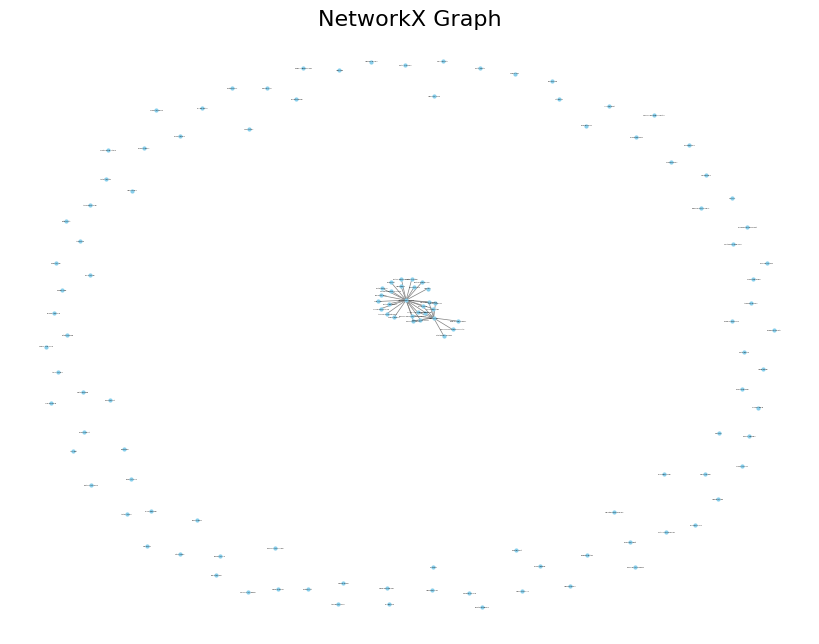

In [7]:
# Plot the graph
plt.figure(figsize=(8, 6))  # Optional: Set figure size
# contiene la documentazione di nx.draw
#https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
nx.draw(G, labels=labels, with_labels=True, node_color="skyblue", node_size=4, edge_color="grey", width=0.5  , font_size=1)
plt.title("NetworkX Graph", fontsize=16)  # Optional: Add a title
plt.savefig("networkx_graph.pdf", format="pdf")
plt.show()

Printa a schermo solo i nodi con degree non nullo

In [4]:
# Print nodes with degree > 0 and their 'name' attribute
print("Nodes with degree > 0 and their 'name' attribute:")
for node, degree in G.degree():
    if degree > 0:
        # Access 'name' attribute of the node
        name = G.nodes[node].get('name', 'No name attribute')  # Default in case 'name' is missing
        print(f"ID = {node},  Name = {name} : degree {degree}")

Nodes with degree > 0 and their 'name' attribute:
ID = 7jzR5qj8vFnSu5JHaXgFEr,  Name = Jean Sibelius : degree 12
ID = 5aIqB5nVVvmFsvSdExz408,  Name = Johann Sebastian Bach : degree 24
ID = 50hiYMhi0g77BOkkQ4zebB,  Name = Mstislav Rostropovich : degree 1
ID = 2RBztkH619X8txotuof9Zr,  Name = Czech Radio Symphony Orchestra : degree 1
ID = 4hBgCK8FyJ5bV36ZZLB56X,  Name = Sviatoslav Richter : degree 1
ID = 4IBl8k6ZsBagsI5zRjyXH7,  Name = Emerson String Quartet : degree 2
ID = 2YfFYZnshSzgfLsKZMM4VL,  Name = Dietrich Buxtehude : degree 1
ID = 7KKscZTeDLz1g0QthWCMQV,  Name = George Enescu : degree 1
ID = 5zCaQxjl110XTrm4LQ1CxY,  Name = Herbert von Karajan : degree 2
ID = 5yxyJsFanEAuwSM5kOuZKc,  Name = London Symphony Orchestra : degree 2
ID = 1hRLlo7ZGxEmc0ztMOKurs,  Name = Maria João Pires : degree 1
ID = 3Vfvyx6OouTxYU3emXonW7,  Name = Staatskapelle Dresden : degree 1
ID = 2wOqMjp9TyABvtHdOSOTUS,  Name = Ludwig van Beethoven : degree 1
ID = 1385hLNbrnbCJGokfH2ac2,  Name = Franz Liszt : deg

Stampa a schermo tutti i nodi con un certo nome

In [5]:
for node, degree in G.degree():
    # Access 'name' attribute of the node
    name = G.nodes[node].get('name', 'No name attribute')  # Default in case 'name' is missing
    if (name == "Giuseppe Verdi"):
        print(f"ID = {node},  Name = {name} : degree {degree}")

ID = 1JOQXgYdQV2yfrhewqx96o,  Name = Giuseppe Verdi : degree 0
